In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import enchant
import cloudpickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = cloudpickle.load(open("pickles/cleaned_forum_data.pkl", "rb" ) )


asktxt = df['askertxt'].as_matrix()
doctxt = df['doctortxt'].as_matrix()

In [3]:
disease_db=cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

diag = cloudpickle.load(open("pickles/doctortext_labels.pkl", "rb" ) )
antidiag = cloudpickle.load(open("pickles/askertext_labels.pkl", "rb" ) )
y_1=np.asarray(diag.todense()).squeeze() 
y_2=np.asarray(antidiag.todense()).squeeze() 
y_t = 1*((y_1+y_2)>0)

In [4]:
forum_vectorizer = cloudpickle.load(open("pickles/forum_vectorizer.pkl", "rb" ) )

In [5]:
tfidf_t = forum_vectorizer.transform(asktxt)

In [6]:
df['label']=''
for i in range(y_t.shape[0]):
    if(i%1000==0):
        print i
    dg = y_t[i,:]
    names = [disease_db[k]['name'] for k in np.nonzero(dg)[0]]
    df.loc[i,'label']=';'.join(names)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000


In [7]:
vec_keep = (y_t.sum(axis=1)>0) & (df['doctorgrd']>10) & (df['doctorgrd']<20) & (df['askergrd']>5) & (df['askergrd']<20) 
tfidf = tfidf_t[np.nonzero(vec_keep)[0],:]
y = y_t[np.nonzero(vec_keep)[0],:]
forum_db=df.loc[vec_keep,:]

(13458, 12)


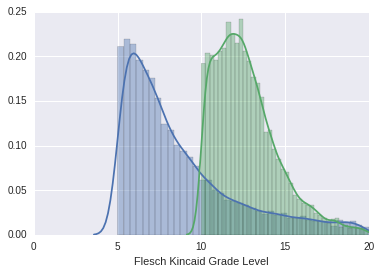

In [8]:
print forum_db.shape
sns.distplot(forum_db['askergrd'],40)
sns.distplot(forum_db['doctorgrd'],40)
plt.xlim(0, 20)
plt.xlabel('Flesch Kincaid Grade Level')

In [9]:
y.shape

(13458, 72)

In [10]:
with open("pickles/forum_vecrepresent.pkl", 'wb') as handle:
    cloudpickle.dump(tfidf, handle)
with open("pickles/forum_db.pkl", 'wb') as handle:
    cloudpickle.dump(forum_db, handle)
with open("pickles/forum_label.pkl", 'wb') as handle:
    cloudpickle.dump(y, handle)

In [11]:
text = 'I have a rash on my belly'
vec = forum_vectorizer.transform([text])
sim = tfidf.dot(vec.transpose())
forum_db['sims'] = sim


/home/will/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
filt=''
count=10
filt_t = [(filt in l) for l in forum_db['label']]
filt_i = np.nonzero(filt_t)[0]
temp_db =%time forum_db.loc[filt_t,:]
temp_vecr = tfidf[filt_i,:]
sim =%time temp_vecr.dot(vec.transpose())
temp_db['sims']=pd.to_numeric(np.array(sim.todense()).flatten())
# sorty =%time temp_db.sort_values('sims',ascending=False)[['post','askertxt']]
truncy =%time temp_db.nlargest(count,columns=['sims'])
outy =%time truncy.T.to_dict().values()

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 23.7 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.95 ms
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 47.3 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.66 ms
